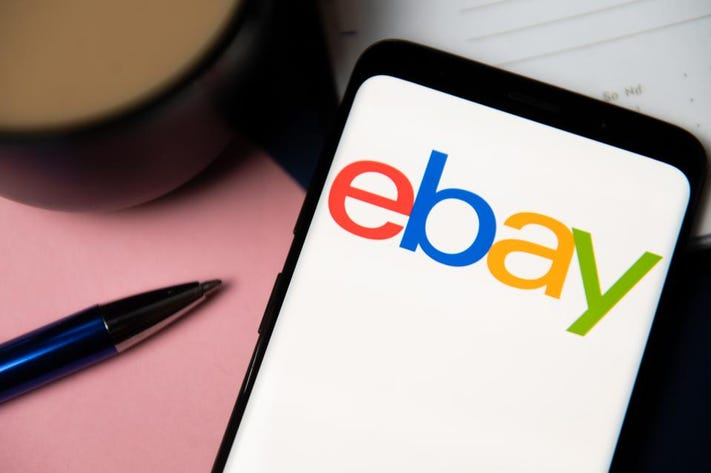

# German Ebay Data Analysis

**In this project I am cleaning and analyzing car listing data that was compiled from a web scraping application and hosted on kagggle. The main goal is to showcase how to clean the data but I will also identify useful summary statistics and key takeaways from the dataset

# Import libraries

In [1]:
import pandas as pd
import numpy as np

**We use the encoding attribute in order to successfully read in the data. In the next cell, we can get a glimpse of what the first couple of rows look like.**

In [2]:
auto = pd.read_csv('autos.csv', encoding='Latin-1')

In [3]:
auto.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

**From the info() output we can see that the column names are a mess! There are both lower and upper case characters which makes it hard to read. Columns like odometer are an object, even though they are expressing integer values. In essence, there is a lot to do to make this df usable.**

In [5]:
auto.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-23 18:39:34,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [6]:
auto['notRepairedDamage'].value_counts()

nein    35232
ja       4939
Name: notRepairedDamage, dtype: int64

In [7]:
auto['nrOfPictures'].value_counts()

0    50000
Name: nrOfPictures, dtype: int64

In [8]:
auto['postalCode'].value_counts()

10115    109
65428    104
66333     54
45888     50
44145     48
        ... 
23942      1
83365      1
95683      1
97794      1
67585      1
Name: postalCode, Length: 7014, dtype: int64

In [9]:
auto['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

**Two columns need to be dropped (seller and nrOfPictures).**

In [10]:
auto = auto.drop(['seller', 'nrOfPictures'], axis=1)

In [11]:
auto.head()

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


**The columns were successfully dropped!**

**Next, we need to make a dictionary that has the old names of the columns and the simplified column names.**

In [12]:
renamed_cols = {
    'dateCrawled': 'date_crawled',
    'offerType': 'offer_type',
    'vehicleType': 'vehicle_type',
    
}

auto.rename(columns=renamed_cols, inplace=True)

In [13]:
auto.head()

,date_crawled,name,offer_type,price,abtest,vehicle_type,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


**That seemed to have worked. Let's rename some other columns and make sure each name is lower-cased to follow the common convention**

In [14]:
changed_cols = {
    'yearOfRegistration': 'registration_year',
    'monthOfRegistration': 'registration_mo',
    'fuelType': 'fuel_type',
    'notRepairedDamage': 'unrepaired_damage',
    'dateCreated': 'ad_created'  
}

auto.rename(columns=changed_cols, inplace=True)


columns_lowered = []
def lower_col(col):
    col = col.lower()
    return col

for c in auto.columns:
    c = lower_col(c)
    columns_lowered.append(c)

In [15]:
columns_lowered

['date_crawled',
 'name',
 'offer_type',
 'price',
 'abtest',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'powerps',
 'model',
 'odometer',
 'registration_mo',
 'fuel_type',
 'brand',
 'unrepaired_damage',
 'ad_created',
 'postalcode',
 'lastseen']

In [16]:
auto.columns = columns_lowered

In [17]:
auto.head()

,date_crawled,name,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer,registration_mo,fuel_type,brand,unrepaired_damage,ad_created,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


**All of the columns were lower-cased and the series that held the new columns were then set to the columns in the auto dataframe. Next, we will check out some summary statistics of the dataframe.**

In [18]:
auto.describe(include='all')

,date_crawled,name,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer,registration_mo,fuel_type,brand,unrepaired_damage,ad_created,postalcode,lastseen
count,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.000000,50000
unique,48213,38754,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,39481
top,2016-03-23 18:39:34,Ford_Fiesta,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN


In [19]:
auto['offer_type'].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [20]:
auto.loc[auto['offer_type'] == 'Gesuch', 'price']

17541    $0
Name: price, dtype: object

In [21]:
auto.iloc[17541]

date_crawled          2016-04-03 15:48:33
name                 Suche_VW_T5_Multivan
offer_type                         Gesuch
price                                  $0
abtest                               test
vehicle_type                          bus
registration_year                    2005
gearbox                               NaN
powerps                                 0
model                         transporter
odometer                        150,000km
registration_mo                         0
fuel_type                             NaN
brand                          volkswagen
unrepaired_damage                     NaN
ad_created            2016-04-03 00:00:00
postalcode                          29690
lastseen              2016-04-05 15:16:06
Name: 17541, dtype: object

In [22]:
auto['price'].value_counts()

$0          1421
$500         781
$1,500       734
$2,500       643
$1,000       639
            ... 
$18,977        1
$299,000       1
$9,455         1
$14,790        1
$35,980        1
Name: price, Length: 2357, dtype: int64

**After looking at the offer_type column I noticed that there was only one instance of the Gesuch value (Gesut is request in German and Angebot is offer). I thought it would be best to keep digging into this singular instance and used the iloc method to check out the row. The weird thing I noticed here was that the price was '$0'**

**From there, I looked at all the values in the price column and found it strange that cars would have a value of zero dollars so this could be an inconsistency which would make sense to drop. But first, let's make sure all the data is consistent with what we expect (i.e. numbers are numberic values instead of text).**

In [23]:
auto['price'].describe()

count     50000
unique     2357
top          $0
freq       1421
Name: price, dtype: object

**The dtype shows object so let's change that to a numberic value.**

In [24]:
auto['price'] = auto['price'].str.replace('$', '')
auto['price'] = auto['price'].str.replace(',', '')

In [25]:
auto['price'] = auto['price'].astype(int)

In [26]:
auto['odometer'] = auto['odometer'].str.replace(',', '')
auto['odometer'] = auto['odometer'].str.replace('km', '')

In [27]:
auto['odometer'] = auto['odometer'].astype(float)

In [28]:
auto.describe()

,price,registration_year,powerps,odometer,registration_mo,postalcode
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,9.840044e+03,2005.073280,116.355920,125732.700000,5.723360,50813.627300
std,4.811044e+05,105.712813,209.216627,40042.211706,3.711984,25779.747957
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.100000e+03,1999.000000,70.000000,125000.000000,3.000000,30451.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49577.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71540.000000
max,1.000000e+08,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


**We removed the parts of the object values in the price and odometer columsn that would interfere with our astype mothod. Afterwards, we were able to convert these series to floats. However, we removed the km from the odometer index and it is important that we ensure the reader knows that it is in km so we will change the column name to odometer_km.**


In [29]:
auto.rename({'odometer':'odometer_km'}, axis=1, inplace=True)

In [30]:
auto.head()

,date_crawled,name,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_mo,fuel_type,brand,unrepaired_damage,ad_created,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,Angebot,5000,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,Angebot,8500,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,Angebot,8990,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,Angebot,1350,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [31]:
auto.describe(include='all')

,date_crawled,name,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_mo,fuel_type,brand,unrepaired_damage,ad_created,postalcode,lastseen
count,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.000000,50000
unique,48213,38754,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,39481
top,2016-03-23 18:39:34,Ford_Fiesta,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,8
mean,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN


In [32]:
lower_results = auto['odometer_km'].value_counts().sort_index(ascending=True).head()

In [33]:
auto['odometer_km'].value_counts().sort_index(ascending=True).head()


5000.0     967
10000.0    264
20000.0    784
30000.0    789
40000.0    819
Name: odometer_km, dtype: int64

In [34]:
auto['odometer_km'].value_counts().sort_index(ascending=True)

5000.0        967
10000.0       264
20000.0       784
30000.0       789
40000.0       819
50000.0      1027
60000.0      1164
70000.0      1230
80000.0      1436
90000.0      1757
100000.0     2169
125000.0     5170
150000.0    32424
Name: odometer_km, dtype: int64

In [35]:
n = 0 
for r in lower_results:
    n += r
    print(n)
    

967
1231
2015
2804
3623


In [36]:
n/50000

0.07246

**What the heck did I just do?! Well, in order to identify the outliers in the odometer_km column I first looked at the lowest 5 value counts in the column. Then, I set that series to a variable I called "lower_results". After, I looped through each value in order to add each number together and then divided that sum by the total number of values in the column, which is 50,000. That's when I saw that the bottom 5 value_counts were only 7% of my values. Therefore, my next step will be to remove these values and fill them with NaN.**

In [37]:
new_auto = auto[auto['odometer_km'].between(50000,150000)]

In [38]:
new_auto['odometer_km'].shape

(46377,)

**Now let's check out the price column. If you remember right, we had some vehicles that were priced at zero dollars. We should definitely be getting rid of those because there is no reason a car would be listed at zero dollars.**

In [39]:
new_auto['price'].value_counts()
price_value_col = new_auto['price'].value_counts()

In [40]:
price_value_col.shape

(2092,)

In [41]:
new_auto['price'].value_counts().sort_index(ascending=True).head(10)

0     1246
1      131
3        1
5        2
10       4
11       2
12       1
13       1
14       1
20       1
Name: price, dtype: int64

In [42]:
new_auto['price'].value_counts().tail()

1659     1
5849     1
69900    1
238      1
28290    1
Name: price, dtype: int64

In [43]:
no_outlier_auto = new_auto[new_auto['price'].between(1,18430)]

In [44]:
print('This is the shape before removing outliers: {}'.format(new_auto['price'].shape[0]))

This is the shape before removing outliers: 46377


In [45]:
print('This is the shape after removing outliers: {}'.format( no_outlier_auto['price'].shape[0]))

This is the shape after removing outliers: 43183


**What have we done so far?**

**1. Removed smaller odometer values in odometer_km column**

**2. Removed zero dollar price in the price column**

**3. Created new variable called no_outlier_auto that represents the above cleaned data.**

In [46]:
no_outlier_auto['registration_mo'].head()

0    3
1    6
2    7
3    6
4    7
Name: registration_mo, dtype: int64

In [47]:
no_outlier_auto['registration_year'].head()

0    2004
1    1997
2    2009
3    2007
4    2003
Name: registration_year, dtype: int64

In [48]:
auto_copy = no_outlier_auto.copy()

In [49]:
auto_copy.loc[:, 'date_crawled'] = auto_copy['date_crawled'].str[:10]

In [50]:
auto_copy.head()

,date_crawled,name,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_mo,fuel_type,brand,unrepaired_damage,ad_created,postalcode,lastseen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,Angebot,5000,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,Angebot,8500,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26,Volkswagen_Golf_1.6_United,Angebot,8990,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,Angebot,1350,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [51]:
auto_copy.loc[:, 'ad_created'] = auto_copy['ad_created'].str[:10]
auto_copy.loc[:, 'lastseen'] = auto_copy['lastseen'].str[:10]

In [52]:
auto_copy.head()

,date_crawled,name,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,odometer_km,registration_mo,fuel_type,brand,unrepaired_damage,ad_created,postalcode,lastseen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,Angebot,5000,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,Angebot,8500,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,Angebot,8990,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,Angebot,1350,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01,39218,2016-04-01


In [53]:
ad_created_list = auto_copy['ad_created'].value_counts(normalize=True, dropna=False).head(30)

In [54]:
ad_created_list.sort_index()

2016-03-05    0.022949
2016-03-06    0.015261
2016-03-07    0.034643
2016-03-08    0.033972
2016-03-09    0.033277
2016-03-10    0.032119
2016-03-11    0.032443
2016-03-12    0.037445
2016-03-13    0.016720
2016-03-14    0.035778
2016-03-15    0.033717
2016-03-16    0.030174
2016-03-17    0.031216
2016-03-19    0.033485
2016-03-20    0.037955
2016-03-21    0.037492
2016-03-22    0.032559
2016-03-23    0.032096
2016-03-24    0.029132
2016-03-25    0.031888
2016-03-26    0.032930
2016-03-27    0.030591
2016-03-28    0.034921
2016-03-29    0.034134
2016-03-30    0.033416
2016-03-31    0.031795
2016-04-01    0.033115
2016-04-02    0.035130
2016-04-03    0.038557
2016-04-04    0.037098
Name: ad_created, dtype: float64

**The above list represents the top 30 most dates for posting an ad on the German Ebay site. March represents some of the busiest dates for posting. However, we do see some fluctuation from the start of the month (around the 5th and 6th) and as well around the 13th of March. For the most part, March has a relatively strong posting activity.**

**Now let's look at the registration year column using the same methodology.**

In [55]:
registration_year_list = auto_copy['registration_year'].value_counts(normalize=True, dropna=False).head(30)

In [56]:
registration_year_list.sort_index()

1985    0.001876
1988    0.002825
1989    0.003751
1990    0.007086
1991    0.007503
1992    0.007966
1993    0.009448
1994    0.013848
1995    0.026862
1996    0.030822
1997    0.044068
1998    0.053007
1999    0.065512
2000    0.070398
2001    0.059306
2002    0.055716
2003    0.061274
2004    0.061019
2005    0.065373
2006    0.059491
2007    0.049255
2008    0.046523
2009    0.041984
2010    0.028136
2011    0.024917
2012    0.015168
2013    0.005071
2016    0.025913
2017    0.030290
2018    0.010166
Name: registration_year, dtype: float64

**Cars registered in 2000 made up 7% of all the postings. Afer that, early 2000 vehicles (2003-2005) each had a little more than 6% of the total number of psotings. The outlier would be 1999, which had 6.5%.**

In [57]:
auto_copy.loc[(auto_copy['registration_year'] > 1000) & (auto_copy['registration_year'] < 9999), ['registration_year','brand']]['brand'].value_counts()

volkswagen        9396
opel              4954
bmw               4605
mercedes_benz     3948
audi              3500
ford              3119
renault           2184
peugeot           1366
fiat              1139
seat               842
mazda              685
skoda              672
nissan             669
citroen            633
smart              608
toyota             555
hyundai            418
volvo              410
honda              365
mitsubishi         364
mini               323
alfa_romeo         305
kia                293
sonstige_autos     287
suzuki             253
chevrolet          224
chrysler           161
daihatsu           109
subaru              96
dacia               90
jeep                87
saab                77
porsche             75
daewoo              73
land_rover          65
rover               63
jaguar              55
lancia              49
trabant             40
lada                26
Name: brand, dtype: int64

**What I did above is a filtered out the rows where the registration year did not make logical sense to include the values. Then I selected the brand column and calculated the value_counts() for each car brand. It is no surprise that Volkswagen is the most popular given the German origin of the website. In fact, the top 5 brands are all German. Surprise surprise...**

In [71]:
top_five_brands = auto_copy.loc[(auto_copy['registration_year'] > 1000) & (auto_copy['registration_year'] < 9999), ['registration_year','brand']]['brand'].value_counts().index[:5]
top_five_brands

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi'], dtype='object')

In [69]:
mean_prices_of_top_brands  = {}

top_five_brands = auto_copy.loc[(auto_copy['registration_year'] > 1000) & (auto_copy['registration_year'] < 9999), ['registration_year','brand']]['brand'].value_counts().index[:5]

for brand in top_five_brands:
    brand_specific = auto_copy.loc[auto_copy['brand'] == brand]
    mean_value = brand_specific['price'].mean()
    mean_prices_of_top_brands[brand] = mean_value
    

In [70]:
print('The mean price for the top five brands is as follows: {}'.format
(mean_prices_of_top_brands))

The mean price for the top five brands is as follows: {'volkswagen': 4228.447850148999, 'opel': 2571.9317723052077, 'bmw': 6001.701411509229, 'mercedes_benz': 5592.558004052685, 'audi': 6024.418571428571}


**Alright, let's unpack the following code. We selected only the data based upon registration year requirements that I felt would clean up the data. After that, I selected the top five brands and placed that information into a pd.series which I then used a for loop to aggregate the data by brand in order to calculate the mean price value for each aggregation. Once we have gathered that data, we can see that opel has the lowest mean price value and that audi is the highest.**

In [74]:
mean_mileage = {}
for brand in top_five_brands:
    brand_specific = auto_copy.loc[auto_copy['brand'] == brand]
    mean_value = brand_specific['odometer_km'].mean()
    mean_mileage[brand] = mean_value


In [76]:
mean_mileage
mileage = pd.Series(mean_mileage)
price = pd.Series(mean_prices_of_top_brands)



In [85]:
price_mileage_df = pd.DataFrame(mileage, columns=['mean_mileage'])

In [86]:
price_mileage_df['mean_price'] = price

In [87]:
price_mileage_df.head()

,mean_mileage,mean_price
volkswagen,137617.603235,4228.447850
opel,136291.885345,2571.931772
bmw,141436.482085,6001.701412
mercedes_benz,140997.973658,5592.558004
audi,141850.000000,6024.418571


**We wanted to see if there was any correlation between mileage and price. The price has lots of variation by brand, while the mileage does not seem to deviate as much by brand. We can therefore say that mileage does not affect price as much as the brand of the vehicle.**